In [1]:
# Goal: Measure width of plateau in r-band
import sys, os, shelve, glob
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataset as dataset

In [18]:
ds = dataset.load_dataset('SN2019odp_phot')

0.03688801875771016


<Table length=12>
      phase               mag               mag_err        instrument
     float64            float64             float64           str8   
------------------ ------------------ -------------------- ----------
1.3077083000025596   16.2813961762006 0.028144266446945523        ZTF
1.3090740999978152  16.27175509753105 0.026935848335133954        ZTF
 1.372013899999729 16.288942512947006  0.02591964209861338        ZTF
2.3047000002115965              16.39                 0.02       SEDM
 2.326799999922514              16.37                 0.01       SEDM
2.4007638999974006 16.285762375459335 0.026900997829673323        ZTF
2.4164583000019775 16.264044100401723 0.025064372876038424        ZTF
3.3204514000026393  16.31034000630681 0.036098843331286164        ZTF
 4.171782400000666   16.3107827955135  0.04486649273439698        ZTF
 5.170694400003413 16.328332427398973  0.06284378075214882        ZTF
 6.171122699997795  16.28838534187355  0.04977180915340531        ZTF
 7.171284700001706 16.295873128071566 0.050744534818741596        ZTF

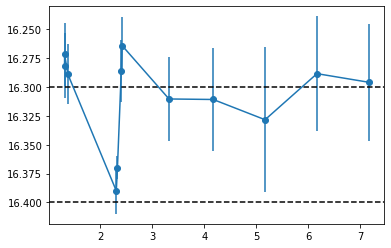

In [24]:
band = 'r'
lc = ds.get_combined_lc(band)
lc['phase'] = lc['mjd'] - ds.transient.prior_t0
lc.sort('mjd')
idx = np.abs(lc['phase']) < 7.5
idx = np.logical_and(idx, lc['phase'] > -2)
idx = np.logical_and(idx, ~lc['upper_limit'])
plt.errorbar(lc['phase'][idx], lc['mag'][idx], yerr=lc['mag_err'][idx], marker='o')
plt.gca().invert_yaxis()
plt.axhline(16.3, ls='--', color='black')
plt.axhline(16.4, ls='--', color='black')
print(np.std(lc['mag'][idx]))

lc[idx]['phase', 'mag', 'mag_err', 'instrument']

16.00643541175922
0.17203469180413353


<Table length=16>
       phase               mag               mag_err        instrument
      float64            float64             float64           str8   
------------------- ------------------ -------------------- ----------
 -6.794799999799579 16.391550000000002                 0.01       SEDM
 -6.772799999918789           16.44155                 0.01       SEDM
-3.6183680999965873 16.116828811505812  0.02600722515960757        ZTF
-3.6174652999980026 16.128823814937576 0.024345399795805335        ZTF
 1.3077083000025596 15.892946176200601 0.028144266446945523        ZTF
 1.3090740999978152 15.883305097531048 0.026935848335133954        ZTF
  1.372013899999729 15.900492512947006  0.02591964209861338        ZTF
 2.3047000002115965           16.00155                 0.02       SEDM
  2.326799999922514           15.98155                 0.01       SEDM
 2.4007638999974006 15.897312375459334 0.026900997829673323        ZTF
 2.4164583000019775 15.875594100401722 0.025064372876038424        ZTF
 3.3204514000026393 15.921890006306809 0.036098843331286164        ZTF
  4.171782400000666   15.9223327955135  0.04486649273439698        ZTF
  5.170694400003413 15.939882427398972  0.06284378075214882        ZTF
  6.171122699997795  15.89993534187355  0.04977180915340531        ZTF
  7.171284700001706 15.907423128071565 0.050744534818741596        ZTF

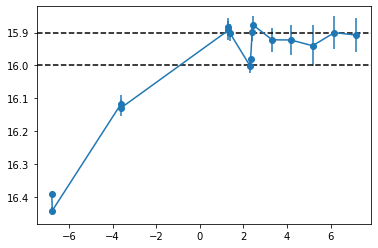

In [30]:
band = 'r'
lc = ds.get_corrected_dataset(band)
lc['phase'] = lc['mjd'] - ds.transient.prior_t0
lc.sort('mjd')
idx = np.abs(lc['phase']) < 7.5
#idx = np.logical_and(idx, lc['phase'] > -2)
#idx = np.logical_and(idx, ~lc['upper_limit'])
plt.errorbar(lc['phase'][idx], lc['mag'][idx], yerr=lc['mag_err'][idx], marker='o')
plt.gca().invert_yaxis()
plt.axhline(15.9, ls='--', color='black')
plt.axhline(16, ls='--', color='black')
print(np.mean(lc['mag'][idx]))
print(np.std(lc['mag'][idx]))
lc[idx]['phase', 'mag', 'mag_err', 'instrument']

In [16]:
# load noras lc
ds = dataset.load_dataset('SN2019odp_phot_short')

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


<Table length=22>
       phase               mag               mag_err        instrument
      float64            float64             float64           str8   
------------------- ------------------ -------------------- ----------
 -7.837100000120699              16.94                 0.02       SEDM
 -7.666932899970561 16.813867004963377 0.021895580776683993        ZTF
 -7.666481500025839 16.836471491079998  0.03433398772843067        ZTF
 -6.794799999799579              16.78                 0.01       SEDM
 -6.772799999918789              16.83                 0.01       SEDM
-3.6183680999092758  16.45391052447991  0.02194664084016218        ZTF
-3.6174653000198305 16.467492309998818 0.023385539178389272        ZTF
 1.3077083001844585  16.22765831430462 0.024240357236697263        ZTF
 1.3090741001069546 16.226054199629207 0.023182681648284735        ZTF
  1.372013899963349 16.236834151525144  0.01962028999152301        ZTF
 2.3047000002115965              16.39                 0.02       SEDM
  2.326799999922514              16.37                 0.01       SEDM
 2.4007639000192285  16.23363247848206 0.019049135250753794        ZTF
 2.4164582998491824 16.211378328100214 0.016875651639481314        ZTF
 3.3204513997770846 16.252602820846146  0.02056189405826096        ZTF
   4.17178239999339 16.252651576898298  0.02153247578165322        ZTF
  5.170694400090724 16.266001566030404 0.030877444378797424        ZTF
  6.171122699975967  16.23820884922099 0.037630662467204895        ZTF
 7.1712846998125315 16.253712827902515 0.023207901904310164        ZTF
   9.17236110009253  16.31473858025992  0.04344342350155673        ZTF
    9.3218999998644              16.43                 0.01       SEDM
  9.344000000040978              16.38                 0.01       SEDM

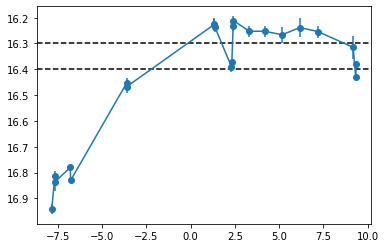

In [17]:
band = 'r'
lc = ds.get_combined_lc(band)
lc['phase'] = lc['mjd'] - ds.transient.prior_t0
lc.sort('mjd')
idx = np.abs(lc['phase']) < 10
idx = np.logical_and(idx, ~lc['upper_limit'])
plt.errorbar(lc['phase'][idx], lc['mag'][idx], yerr=lc['mag_err'][idx], marker='o')
plt.gca().invert_yaxis()
plt.axhline(16.3, ls='--', color='black')
plt.axhline(16.4, ls='--', color='black')
lc[idx]['phase', 'mag', 'mag_err', 'instrument']